# What is a distribution?

You have probably heard of data being described by its *distribution*, but what is a distribution? 

The **distribution** of a variable, $X$, is a graphical or functional description of all the possible values of $X$ and how often they occur.

Let's explore this idea using the UTSC Weather Station surface air temperature (SAT) data.

In [1]:
# import packages
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16) #set default font size and weight for plots
from IPython import display
import time

Load the data:

In [2]:
# load data: UTSC air temperature data for the years 2015-2018. in deg C. Data are collected hourly.
filename = 'UTSC_TC_20152018.csv'
X = np.genfromtxt(filename, delimiter = ',')

Let's start by just choosing two smaller sub-samples of data.

In [3]:
# draw random values from X

x = np.random.choice(X,size = 25) # sample size of 25
y = np.random.choice(X,size = 1000) # sample size of 1000

It's always good practice to check that we did what we wanted to do.

In [4]:
# how many elements do x and y have?
print(len(x),len(y))

25 1000


In [5]:
# what does x look like?
print(x)

[ -3.26    7.922 -12.26   18.38    0.522  17.02    5.988  14.23   13.79
  15.38   16.75   -8.92   -1.085  -6.439   3.376   6.092  18.15   14.92
   1.296  -6.624  20.87   -5.528  21.34   13.85   13.5  ]


Now, we will plot the data along the x-axis with an arbitrary y-axis to get a visual sense of what values occur most often.

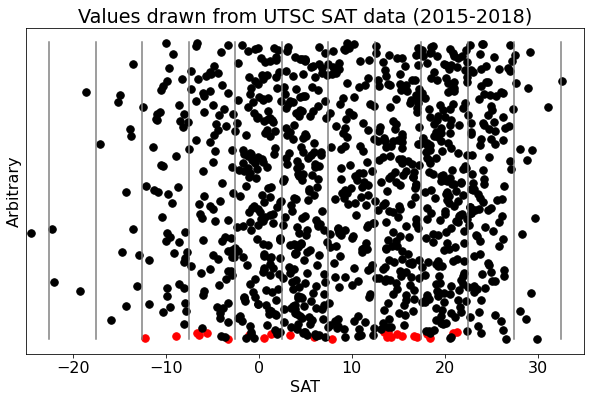

In [6]:
# plot data
plt.figure(figsize=(10,6))

# first, add the labels, ticks, etc.
plt.xlabel('SAT')
plt.ylabel('Arbitrary')
plt.yticks([])
plt.title('Values drawn from UTSC SAT data (2015-2018)')
plt.xlim(-25,35)

# now, plot x along the x-axis
plt.plot(x,np.arange(0,np.size(x)),'.r', markersize = 15)
display.clear_output(wait=True) # this just adds a delay when plotting
display.display(plt.gcf())
time.sleep(3)

# next, plot y along the x-axis on the same plot
plt.plot(y,np.arange(0,np.size(y)),'.k', markersize = 15)
display.clear_output(wait=True)
display.display(plt.gcf())
time.sleep(3)

# add vertical lines
xinc = np.arange(-25,40,5) # increments denote the bin size
for ind, val in enumerate(xinc[1:]):
    plt.plot([val-2.5, val-2.5], [0, np.size(y)],'-', color = 'gray')
display.clear_output(wait=True)

We can see from the plot above that there are more points clustered in certain regions. 

If we count up all the points in each of our "bins" (regions between pairs of vertical bars) and replot our data in terms of counts as a function of the data value, then we get a **histogram**. A histogram is one type of graphical representation of a distribution.

## The Histogram

A **histogram** is a graphical representation of data using a bar graph. The width of each bar represents a range of data values and the height of each bar represents the number of times the sample data falls within that range (i.e., the count).

Let's use python to construct histograms of our SAT samples.

In [7]:
# use the histogram function to get the counts per bin (xinc)
hx = np.histogram(x,xinc)
hy = np.histogram(y,xinc)

What is the output that we get from the histogram function? 

In [8]:
# hx consists of two arrays, the first contains the counts and the second the bin edges
print(hx)

(array([0, 0, 1, 4, 2, 3, 3, 5, 5, 2, 0, 0]), array([-25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35]))


(-30.0, 35.0)

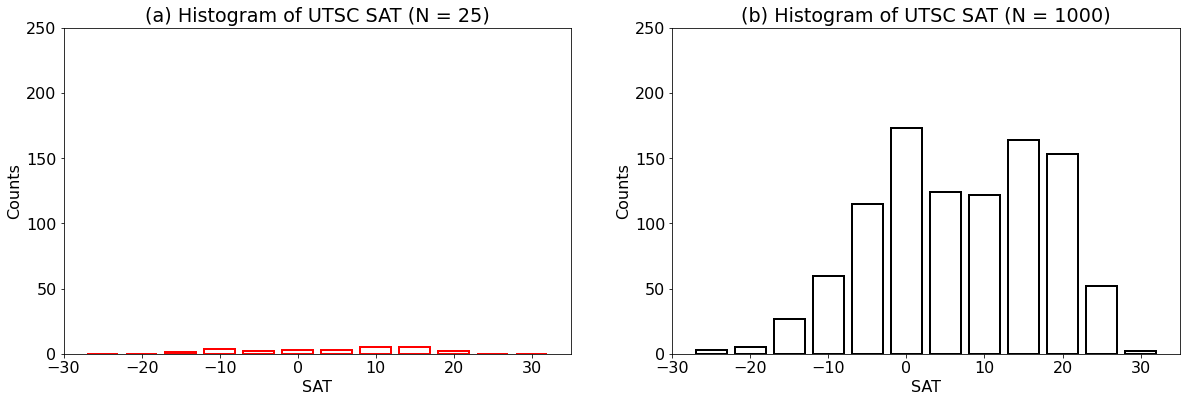

In [9]:
# plot our historgrams

plt.figure(figsize=(20,6))

# use plt.bar to plot the histogram for x
plt.subplot(1,2,1)
plt.bar(hx[1][:-1],hx[0],edgecolor = 'r', color = [], width = 4, linewidth = 2)
plt.xlabel('SAT')
plt.ylabel('Counts')
plt.title('(a) Histogram of UTSC SAT (N = 25)')
plt.ylim(0,250)
plt.xlim(-30,35)

# and the histogram for y
plt.subplot(1,2,2)
plt.bar(hy[1][:-1],hy[0],edgecolor = 'k', color = [], width = 4, linewidth = 2)
plt.xlabel('SAT')
plt.ylabel('Counts')
plt.title('(b) Histogram of UTSC SAT (N = 1000)')
plt.ylim(0,250)
plt.xlim(-30,35)

What happened? Why do the two histograms look so different even though they are both drawn from the same distribution?

When we plot our distributions based on counts, we find that the plot will change depending on the sample size. How could we plot this differently to more clearly display both distributions on the same plot?

We can divide our counts in each bin by the total number of counts to **convert from counts to relative frequency**. This conversion allows us to describe the discrete **probability distribution** of the data.

(-30.0, 35.0)

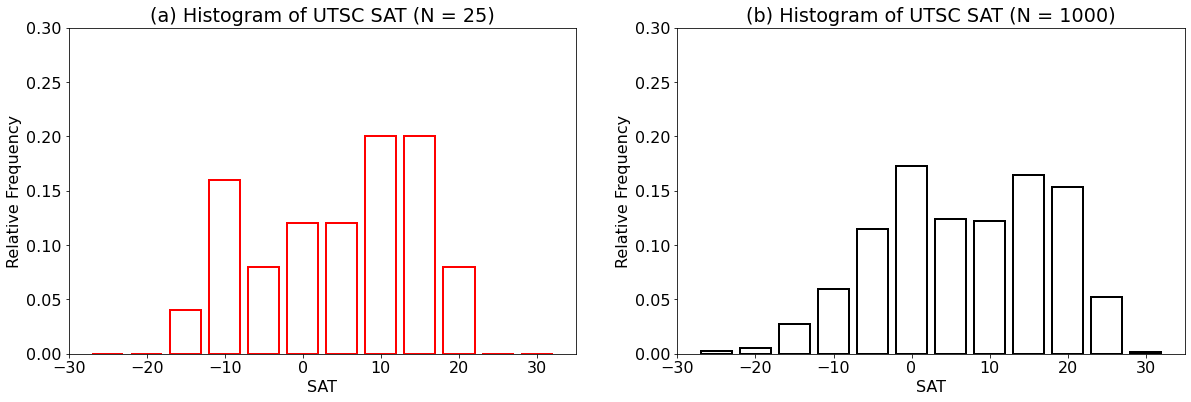

In [10]:
# plot the normalized histogram
plt.figure(figsize=(20,6))

# use plt.bar to plot the histogram for x
plt.subplot(1,2,1)
plt.bar(hx[1][:-1],hx[0]/np.size(x),edgecolor = 'r', color = [], width = 4, linewidth = 2)
plt.xlabel('SAT')
plt.ylabel('Relative Frequency')
plt.title('(a) Histogram of UTSC SAT (N = 25)')
plt.ylim(0,0.3)
plt.xlim(-30,35)

# and the histogram for y
plt.subplot(1,2,2)
plt.bar(hy[1][:-1],hy[0]/np.size(y),edgecolor = 'k', color = [], width = 4, linewidth = 2)
plt.xlabel('SAT')
plt.ylabel('Relative Frequency')
plt.title('(b) Histogram of UTSC SAT (N = 1000)')
plt.ylim(0,0.3)
plt.xlim(-30,35)

Notice that summing over the frequencies of each bin equals 1 or 100%. Another way to express this is by the **cumulative probability distribution**, which is simply the cumulative sum over the probability distribution.

In [11]:
# compute the cummulative distribution using the cumulative sum function np.cumsum()
hxx = np.cumsum(hx[0])
hyy = np.cumsum(hy[0])
print(hyy)

[   3    8   35   95  210  383  507  629  793  946  998 1000]


Now, let's plot it.

(-30.0, 35.0)

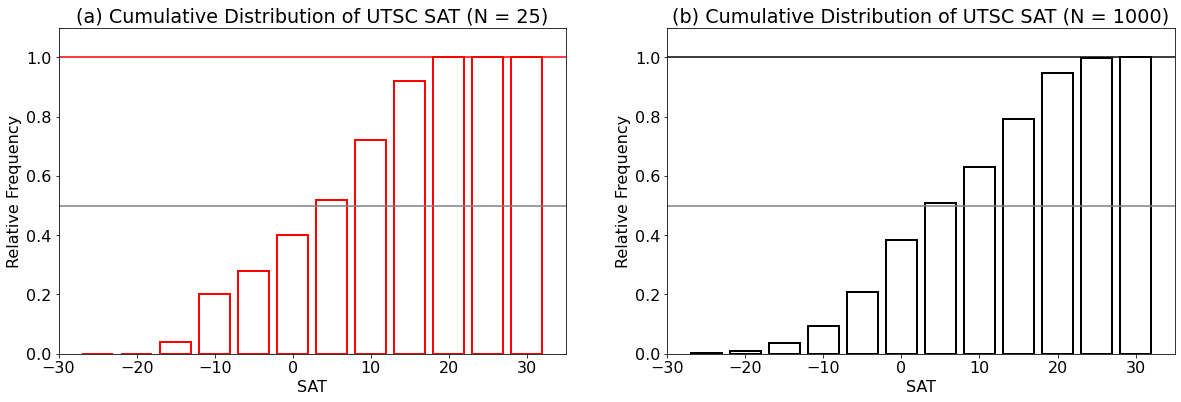

In [12]:
# plot the cumulative distribution
plt.figure(figsize=(20,6))

# use plt.bar to plot the histogram for x
plt.subplot(1,2,1)
plt.bar(hx[1][:-1],hxx/np.size(x),edgecolor = 'r', color = [], width = 4, linewidth = 2)
plt.axhline(1,color='r')
plt.axhline(0.5,color='gray')
plt.xlabel('SAT')
plt.ylabel('Relative Frequency')
plt.title('(a) Cumulative Distribution of UTSC SAT (N = 25)')
plt.ylim(0,1.1)
plt.xlim(-30,35)

# and the histogram for y
plt.subplot(1,2,2)
plt.bar(hy[1][:-1],hyy/np.size(y),edgecolor = 'k', color = [], width = 4, linewidth = 2)
plt.axhline(1,color='k')
plt.axhline(0.5,color='gray')
plt.xlabel('SAT')
plt.ylabel('Relative Frequency')
plt.title('(b) Cumulative Distribution of UTSC SAT (N = 1000)')
plt.ylim(0,1.1)
plt.xlim(-30,35)

As we can see in the figure above, the cumulative distribution will always sum to 1. The gray horizontal lines are plotted for a value of 0.5. This indicates that 50% of the sample data values fall within bins below this line and 50% fall within the bins above this line. Note that the 50% cut-off likely lies somewhere within the width of the intersecting bin.